<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/THRISS/00_example_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab, Numpy and OpenCV basics

In this notebook we will cover the basics of working in the Google Colab environment, NumPy and basic image manipulation in OpenCV.

## Google Colab

Google Colab (http://colab.research.google.com) is a free service which allows the users to run ipython notebooks in the cloud. The service also allows the users to leverage a free GPU. A Google account is necessary to use this service. The notebooks can also be downloaded and run locally using the jupyter notebook in the directory where the notebooks are saved (provided you have jupyter installed).

There are two types of cells in these notbooks. The first type is a text cell such as this one. The other type of a cell is code cell. The cells with code can be run with the play button to the left of the cell. All of the cells can also be run by clicking choosing Runtime -> Run All in the menu at the top of this page. The cells share a scope so it is necessary to be mindful of the order in which the cells run. If you need to restart the notebook you can look into the Runtime tab in the options on top of the page.

You can try running a simple python code in the following cell.

In [1]:
a = [5,'Hello']
s = '{} World!'
print(s.format(a[1]))

def best_function(arg):
  return arg + 5

print(best_function(8))

Hello World!
13


Saving and using files that are stored permanently can be done in different ways, but the easiest option is to connecting Google Drive to our notebook instance. This is done in a following way:
(Note: this assumes that you have created a directory named Colab in your Google Drive)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab/'

Mounted at /content/gdrive


You can then access the folder (if it exists).

In [3]:
import os
os.listdir(root_path)

['mnist-fc-trained.h5', 'cifar-fc-trained.h5']

You can also use the standard unix commands by preceeding them with an exclamation point.

In [4]:
!pwd
!ls
!mkdir random_dir
!ls
!wget https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png
!ls

/content
gdrive	sample_data
gdrive	random_dir  sample_data
--2024-06-10 17:24:18--  https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png
Resolving www.google.com (www.google.com)... 142.250.31.105, 142.250.31.106, 142.250.31.104, ...
Connecting to www.google.com (www.google.com)|142.250.31.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5969 (5.8K) [image/png]
Saving to: ‘googlelogo_color_272x92dp.png’

googlelogo_color_27 100%[===================>]   5.83K  --.-KB/s    in 0s      

2024-06-10 17:24:18 (63.4 MB/s) - ‘googlelogo_color_272x92dp.png’ saved [5969/5969]

gdrive	googlelogo_color_272x92dp.png  random_dir  sample_data


This is not always necessary as you can access the instance file structure in the panel on the left.

**<----**

## NumPy
A tensor is a base data structure we will use when dealing with neural networks. Tensor is a generalization of vectors and matrices. Vectors from $\mathbb{R}^n$ are first order (rank) tensors and matrices are second order (rank) tensors. A third order (rank) tensor can be additionally indexed with one more index. Sometimes the order of tensor is also called its rank. Strictly speaking tensor dimension and order are two different concepts. For example, we can have a third order tensor with dimension $ 20 \times 24 \times 6$. However, in many texts authors interchange tensor order (rank) with dimension. This is sometimes confusing, but usually the meaning is evident from context.

To conform to standards we import numpy as np. A vector (e.g. first order tensor) can be created from a simple list using the np.array constructor. It might be important to initialize the array with a specific data type which can be done by using the dtype keyword in the constructor. **Not specifying the dtype can cause various complications later in the code.**

If you need more information on NumPy you can check out the documentation of NumPy: https://docs.scipy.org/doc/numpy/


In [5]:
import numpy as np

a = np.array([3, 2, 3, 4])
print(a)
b = np.array([1,5,7], dtype=np.float32)
print(b)

[3 2 3 4]
[1. 5. 7.]


A matrix can be created from a list of lists, but it is necessary for the lengths of the inner lists to be consitent. If they are not consistent we will obtain a vector of lists instead of matrix of values.

In [6]:
A = np.array([[1,5,8],[50,60,84]])
print(A)
B = np.array([[7,8],[6,7],[0,9,4]])
print(B)

[[ 1  5  8]
 [50 60 84]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

The array object has a shape method which tells us its shape (dimensions) and method dtype which returns the data type of the values in the tensor. It also has a method astype which returns an array with the specified type.

In [7]:
print(a.shape)
print(A.shape)
print(A.dtype)
C = A.astype(np.float32)
print(C.dtype)


(4,)
(2, 3)
int64
float32


Numpy has a few functions to generate basic tensors. The most commnly used onse are: np.zeros, np.ones and np.empty.

In [8]:
z = np.zeros([5,10])
print(z)
o = np.ones([3,4,5])
print(o)
e = np.empty([6])
print(e)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]]
[4.9979601e-310 0.0000000e+000 0.0000000e+000 0.0000000e+000
 0.0000000e+000 0.0000000e+000]


It is also possible the create tensors with random numbers by using np.random.random.

In [9]:
r = np.random.random([6,10,3])
print(r)

[[[0.6259147  0.70775466 0.76124797]
  [0.364652   0.52278754 0.53548451]
  [0.85012541 0.45295793 0.98458684]
  [0.98108721 0.92058109 0.74844549]
  [0.98399002 0.93675322 0.94966461]
  [0.60192399 0.3176576  0.70278182]
  [0.34348229 0.66642664 0.99536214]
  [0.83625648 0.25430514 0.8268185 ]
  [0.37578214 0.71829116 0.82321406]
  [0.16236304 0.88056433 0.25048005]]

 [[0.47316684 0.38468116 0.50649292]
  [0.22948718 0.72451518 0.14304895]
  [0.12997111 0.12539921 0.71406407]
  [0.3831757  0.84750141 0.04077044]
  [0.07307846 0.80753821 0.09335245]
  [0.2319321  0.29833095 0.82293363]
  [0.78096061 0.3137058  0.30100402]
  [0.48744759 0.87382602 0.3967171 ]
  [0.57419786 0.58221836 0.66636951]
  [0.72429254 0.83957857 0.31460148]]

 [[0.83764808 0.73296996 0.56461184]
  [0.94193915 0.08600356 0.16933841]
  [0.94347984 0.82468767 0.40627627]
  [0.93172462 0.94859445 0.87886055]
  [0.93320113 0.93514685 0.86402506]
  [0.09609259 0.04223647 0.84350585]
  [0.49281153 0.56978565 0.4326901

We can now use these random arrays to work with indices. Indexing is similar to Matlab, but the python conventions are applied. We can use multiple indices (based on tensor order). If we omit one of the indices it is implicitly used as :, which means that all of the elements along that dimesnsions are used.

In [10]:
print(r[3,4,1])
print(r[:,:,-1])
print(r[:,:,1].shape)
print(r[0:4,5:6,:])
print(r[0:4,5:6,:].shape)

0.9823180862438313
[[0.76124797 0.53548451 0.98458684 0.74844549 0.94966461 0.70278182
  0.99536214 0.8268185  0.82321406 0.25048005]
 [0.50649292 0.14304895 0.71406407 0.04077044 0.09335245 0.82293363
  0.30100402 0.3967171  0.66636951 0.31460148]
 [0.56461184 0.16933841 0.40627627 0.87886055 0.86402506 0.84350585
  0.43269019 0.55394618 0.43751559 0.86725974]
 [0.53818    0.46122806 0.95427703 0.11439259 0.58759988 0.02012569
  0.25740078 0.14040512 0.17951775 0.3911827 ]
 [0.79036204 0.07825389 0.0914695  0.98439371 0.20921555 0.1223466
  0.39055749 0.61478935 0.4543018  0.76800113]
 [0.53615882 0.41557893 0.52125647 0.20648206 0.0160438  0.16675598
  0.92476865 0.22197689 0.6582605  0.29028676]]
(6, 10)
[[[0.60192399 0.3176576  0.70278182]]

 [[0.2319321  0.29833095 0.82293363]]

 [[0.09609259 0.04223647 0.84350585]]

 [[0.59071386 0.58959026 0.02012569]]]
(4, 1, 3)


We can also use steps when indexing this is also called slicing. That can be done by another colon. The format is then [start:stop:step]. If any of that is left empty the start is implicitly assumed to be 0, the end -1 and step 1.

In [11]:
p = np.arange(25)
print(p)
print(p[4:16:2])
print(p[2:-4:6])
print(p[:10:])
print(p[::3])
print(p[1::6])
print(p[-6:])
print(r[1::2,0::3,:])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[ 4  6  8 10 12 14]
[ 2  8 14 20]
[0 1 2 3 4 5 6 7 8 9]
[ 0  3  6  9 12 15 18 21 24]
[ 1  7 13 19]
[19 20 21 22 23 24]
[[[0.47316684 0.38468116 0.50649292]
  [0.3831757  0.84750141 0.04077044]
  [0.78096061 0.3137058  0.30100402]
  [0.72429254 0.83957857 0.31460148]]

 [[0.43328504 0.2130113  0.53818   ]
  [0.25878564 0.57235951 0.11439259]
  [0.6918888  0.05923689 0.25740078]
  [0.39396493 0.77013417 0.3911827 ]]

 [[0.82217195 0.34913975 0.53615882]
  [0.97334236 0.63193378 0.20648206]
  [0.15039443 0.4041225  0.92476865]
  [0.16841926 0.93101123 0.29028676]]]


We will often need to create a so-called singleton dimension. This cane be done by adding a None index, or in a more python way by using np.newaxis.

In [12]:
print(r[None,:,:,:].shape)
print(r[None].shape)
print(r[np.newaxis,:,:,:].shape)
print(r[:,:,:,np.newaxis].shape)
print(r[np.newaxis,:,0,:].shape)

(1, 6, 10, 3)
(1, 6, 10, 3)
(1, 6, 10, 3)
(6, 10, 3, 1)
(1, 6, 3)


Broadcasting is done implicitly.

In [13]:
r += 10
print(r)
r[0,:,:] = np.random.random([10,3])
print(r.shape)
r[0] = np.random.random([10,3])
print(r.shape)
r[0] = np.zeros([10,1])
print(r.shape)
r/=500
print(r)

[[[10.6259147  10.70775466 10.76124797]
  [10.364652   10.52278754 10.53548451]
  [10.85012541 10.45295793 10.98458684]
  [10.98108721 10.92058109 10.74844549]
  [10.98399002 10.93675322 10.94966461]
  [10.60192399 10.3176576  10.70278182]
  [10.34348229 10.66642664 10.99536214]
  [10.83625648 10.25430514 10.8268185 ]
  [10.37578214 10.71829116 10.82321406]
  [10.16236304 10.88056433 10.25048005]]

 [[10.47316684 10.38468116 10.50649292]
  [10.22948718 10.72451518 10.14304895]
  [10.12997111 10.12539921 10.71406407]
  [10.3831757  10.84750141 10.04077044]
  [10.07307846 10.80753821 10.09335245]
  [10.2319321  10.29833095 10.82293363]
  [10.78096061 10.3137058  10.30100402]
  [10.48744759 10.87382602 10.3967171 ]
  [10.57419786 10.58221836 10.66636951]
  [10.72429254 10.83957857 10.31460148]]

 [[10.83764808 10.73296996 10.56461184]
  [10.94193915 10.08600356 10.16933841]
  [10.94347984 10.82468767 10.40627627]
  [10.93172462 10.94859445 10.87886055]
  [10.93320113 10.93514685 10.864025

An array can be reshaped using np.reshape

In [14]:
q = np.reshape(r, [6,30])
print(q.shape)

(6, 30)


Arrays can be joined. One way is to use np.concatenate([arr1, arr2, ...], axis = i) which connects the arrays arr1 and arr2 through a given axis i. Note that is usually better (for code comprehension) to explicitly use the keyword axis even if it is redundant.

In [15]:
a = np.ones([3,4])
b = np.zeros([6,4])
c = np.concatenate([a,b], axis = 0)
print(c)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


A different option is to use np.stack([arr1, arr2, ...], axis= i). The difference is that this creates increases the tensor order by one.

In [16]:
a = np.ones([6,4,3])
b = np.zeros([6,4,3])
d = np.stack([a,b], axis = 0)
print(d.shape)
f = np.stack([a,b], axis = -1)
print(f.shape)
g = np.stack([a,b], axis = 1)
print(g.shape)

(2, 6, 4, 3)
(6, 4, 3, 2)
(6, 2, 4, 3)


We can also index using conditions.

In [17]:
r = np.random.random([5,5])
print(r)
r[r < 0.5] = -500
print(r)

[[0.13573682 0.1279296  0.17569736 0.23996455 0.87465761]
 [0.05841309 0.43634909 0.45003536 0.07205075 0.87302937]
 [0.84211334 0.51883257 0.21491226 0.35490222 0.49372628]
 [0.96746105 0.78017012 0.17852161 0.25111806 0.43470378]
 [0.91689649 0.89641856 0.10248631 0.74895157 0.19622265]]
[[-500.         -500.         -500.         -500.            0.87465761]
 [-500.         -500.         -500.         -500.            0.87302937]
 [   0.84211334    0.51883257 -500.         -500.         -500.        ]
 [   0.96746105    0.78017012 -500.         -500.         -500.        ]
 [   0.91689649    0.89641856 -500.            0.74895157 -500.        ]]


The conditions can also be using in np.whare(cond, a1, a2), which returns an array which contans elemnts from a1 where the condition is true and elements from a2 where condition is false. We can also use np.arange(i) which is equivalent to range(i) from python.

In [18]:
a = np.arange(10)
print(a)
b = np.where(a < 5, a, a**2)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4 25 36 49 64 81]


**Mathematical Operations**

We can also apply mathematical operations on the arrrays.

In [19]:
r = np.random.rand(10, 2)

In [20]:
print(np.sin(r))
print(np.cos(r))
print(np.arccos(r))
print(np.exp(r))
print(r ** 2)

[[0.26412398 0.09044952]
 [0.21680335 0.74988597]
 [0.24086998 0.50540478]
 [0.62889734 0.10272729]
 [0.67374364 0.80238681]
 [0.44052017 0.34690553]
 [0.4546934  0.67929491]
 [0.51950587 0.21769057]
 [0.34802253 0.39758101]
 [0.55533941 0.5642847 ]]
[[0.96448874 0.99590104]
 [0.9762153  0.6615671 ]
 [0.97055739 0.86288239]
 [0.77748835 0.99470956]
 [0.73896516 0.59680434]
 [0.89774271 0.93790008]
 [0.89064803 0.7338654 ]
 [0.85446688 0.97601784]
 [0.93748617 0.91756708]
 [0.8316238  0.82558027]]
[[1.30021097 1.48009873]
 [1.35047957 0.55880419]
 [1.32506873 1.01237146]
 [0.8228507  1.46770498]
 [0.73882071 0.37287502]
 [1.09710079 1.20866331]
 [1.07920662 0.72755689]
 [0.99288868 1.34954803]
 [1.20738915 1.14957094]
 [0.94125875 0.92783689]]
[[1.30642649 1.09480176]
 [1.24425722 2.33471471]
 [1.2754029  1.69867919]
 [1.97414257 1.10839036]
 [2.09439185 2.53776518]
 [1.57803123 1.42513952]
 [1.60324219 2.11023943]
 [1.72680445 1.24538867]
 [1.4268382  1.50512963]
 [1.80177275 1.8213292

**Summary operations**
Various operations can also be performed on numpy arrays. For example, it is possible to sum an array using the np.sum command. The commands np.min (mininum), np.max (maximum), np.mean (average), np.median (median), np.var (variation) and np.std (standard deviation) work similarly.



In [21]:
a = np.random.rand(4, 3)
print(a)
print(np.mean(a))
print(np.median(a))
print(np.sum(a))
print(np.max(a))
print(np.std(a))

[[0.7796964  0.36244535 0.5643818 ]
 [0.8738053  0.53762097 0.01607553]
 [0.76879008 0.08418277 0.23888661]
 [0.11049005 0.95472652 0.74984794]]
0.5034124438977584
0.5510013873391149
6.040949326773101
0.9547265185528265
0.31763917492238514


**Keyword axis**

We often want an operation to be performed only along a single dimension (e.g. sum all elements in each row). In that case, it is appropriate to use the axis keyword. This will allow us to sum along a specific dimension. It is also possible to use tuples to perform the operation along multiple dimensions at the same time. Many numpy methods have this keyword available.


In [22]:
print(a)
print(np.sum(a, axis=0))
print(np.sum(a, axis=0).shape)
print(np.sum(a, axis=1))
print(np.sum(a, axis=1).shape)

b = np.random.rand(4,3,16,16)
print(np.sum(b, axis=(1,2,3)))
print(np.sum(b, axis=(1,2,3)).shape)

[[0.7796964  0.36244535 0.5643818 ]
 [0.8738053  0.53762097 0.01607553]
 [0.76879008 0.08418277 0.23888661]
 [0.11049005 0.95472652 0.74984794]]
[2.53278183 1.93897562 1.56919188]
(3,)
[1.70652356 1.4275018  1.09185946 1.81506451]
(4,)
[384.25842504 380.35936065 396.47898766 382.41424612]
(4,)


For minimum and maximum, there are two more functions (np.minimum and np.maximum) that compare two fields.

In [23]:
b = ((np.arange(12) - 7) * 2).reshape(4,3)
print(b)
print(np.maximum(a, b))

[[-14 -12 -10]
 [ -8  -6  -4]
 [ -2   0   2]
 [  4   6   8]]
[[0.7796964  0.36244535 0.5643818 ]
 [0.8738053  0.53762097 0.01607553]
 [0.76879008 0.08418277 2.        ]
 [4.         6.         8.        ]]


**Multiplication**

We can also multiply arrays. We can use either the `*` operator, which performs element-by-element multiplication, or the `@` operator, which performs matrix multiplication. In the case of `@`, the vector is always considered to be column or row based, as appropriate. It is also possible to use `np.dot` for multiplication. We can also transpose matrices using the `.T` method

In [24]:
x = np.array([1, 2, 3])
y = np.array([8, 0, 7])

A = np.arange(9).reshape(3, 3)
B = np.random.rand(4, 3)
C = np.random.rand(3, 3)

print(x @ y)
print(x * y)

print(20 * '*')

print(A @ x)
print(y @ A)
print(x @ C)
print(x @ A @ y)

print(20 * '*')

print(A * C)
print(A @ C)
print(B @ A)

print(20 * '*')

#pri nasobeni po prvkoch moze dojst k broadcastingu
print(A * x)

print(20 * '*')

#tieto nebudu fungovat
print(x @ B)
print(A @ B)

29
[ 8  0 21]
********************
[ 8 26 44]
[42 57 72]
[2.16715355 1.38436966 2.70359563]
444
********************
[[0.         0.08589045 0.09889526]
 [1.73108469 0.18911054 3.82470761]
 [0.48116426 2.80915584 2.99803987]]
[[0.73741632 0.84989359 1.51445149]
 [5.02662801 2.45332179 5.0818839 ]
 [9.3158397  4.05674998 8.64931631]]
[[3.59747726 4.82166835 6.04585943]
 [3.87501216 5.11488037 6.35474859]
 [3.04148738 4.6123719  6.18325641]
 [2.25495376 3.57011055 4.88526733]]
********************
[[ 0  2  6]
 [ 3  8 15]
 [ 6 14 24]]
********************


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

## OpenCV

OpenCV is an image-manipulation library. We will now use it to load images and display them, but later we will use it for various forms of image processing.

In [25]:
import cv2

Loading an image is easy in OpenCV. We will load the image that we downloaded through in the introductory part of the exercise. We can see that this image is a NumPy array. With dimensions width x height x 3. The last channel represents the three RGB components. So we have three matrices and each of them the intensity of one of the three components. It should be noted that **OpenCV works with the image in BGR channel-order by default!** while many other libraries assume the RGB order.

In [26]:
img = cv2.imread('googlelogo_color_272x92dp.png')
print(type(img))
print(img.shape)
print(img.dtype)

<class 'numpy.ndarray'>
(92, 272, 3)
uint8


Displaying an image in OpenCV is a bit complicated. Since we are in Google Colab, we need another library for that. Specifically matplotlib as previously shown. When displaying an image, it is necessary to convert the image from BGR to RGB.


The commented part of the code shows how it is done when running outside the laptop. cv2.waitKey stops the program from running for the number of milliseconds in its argument, or as long as the key is pressed. If the argument is 0, it waits for the key indefinitely.

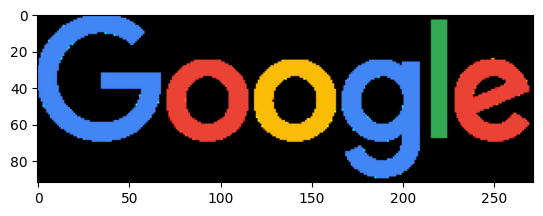

In [27]:
import matplotlib.pyplot as plt
plt.imshow(img[:,:,::-1])
plt.show()

# cv2.imshow('Obrazok', img)
# if cv2.waitKey(0) & 0xFF == ord('q'):
#     return

We can also display the individual channels.

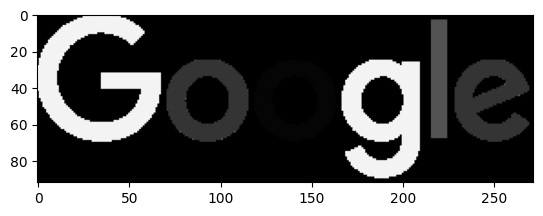

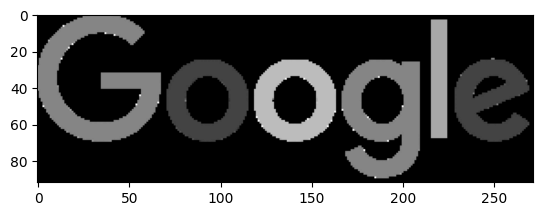

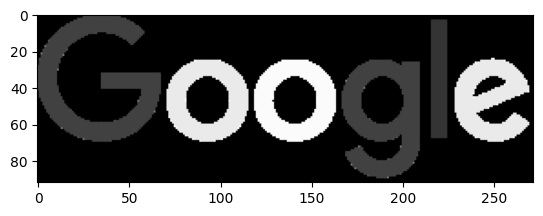

In [28]:
plt.imshow(img[:,:,0],cmap='gray')
plt.show()
plt.imshow(img[:,:,1],cmap='gray')
plt.show()
plt.imshow(img[:,:,2],cmap='gray')
plt.show()

By default, images are in uint8, i.e. integers from 0 to 255. Sometimes we want to get these values into floats, and then values between 0 and 1 are expected by default.

float64


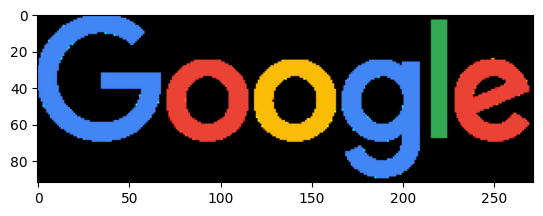

In [29]:
img_f = img / 255
print(img_f.dtype)
plt.imshow(img[:,:,::-1])
plt.show()

S obrazom môžeme jednoducho manipulovať. Napríklad zosíliť jeden kanál.

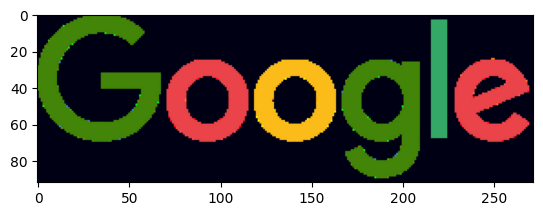

In [30]:
img[:,:,0] += 20
plt.imshow(img[:,:,::-1])
plt.show()

We will now download an image and display it.

In [31]:
!wget 'https://upload.wikimedia.org/wikipedia/commons/0/0a/Malachite_kingfisher_(Corythornis_cristatus_stuartkeithi).jpg'
!mv 'Malachite_kingfisher_(Corythornis_cristatus_stuartkeithi).jpg' bird.jpg
!ls -l

--2024-06-10 17:24:43--  https://upload.wikimedia.org/wikipedia/commons/0/0a/Malachite_kingfisher_(Corythornis_cristatus_stuartkeithi).jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3272846 (3.1M) [image/jpeg]
Saving to: ‘Malachite_kingfisher_(Corythornis_cristatus_stuartkeithi).jpg’

Malachite_kingfishe 100%[===================>]   3.12M  --.-KB/s    in 0.1s    

2024-06-10 17:24:43 (28.8 MB/s) - ‘Malachite_kingfisher_(Corythornis_cristatus_stuartkeithi).jpg’ saved [3272846/3272846]

total 3220
-rw-r--r-- 1 root root 3272846 Feb  7  2018 bird.jpg
drwx------ 5 root root    4096 Jun 10 17:24 gdrive
-rw-r--r-- 1 root root    5969 Oct 22  2019 googlelogo_color_272x92dp.png
drwxr-xr-x 2 root root    4096 Jun 10 17:24 random_dir
drwxr-xr-x 1 root root    4096 Jun  7 13:39 sample_data


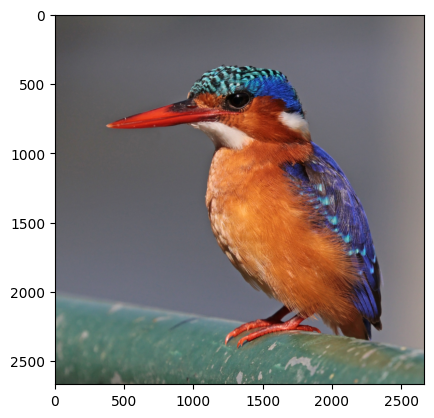

In [32]:
img_b = cv2.imread('bird.jpg')
plt.imshow(img_b[:,:,::-1])
plt.show()

We can make the image larger by specifying the scale.

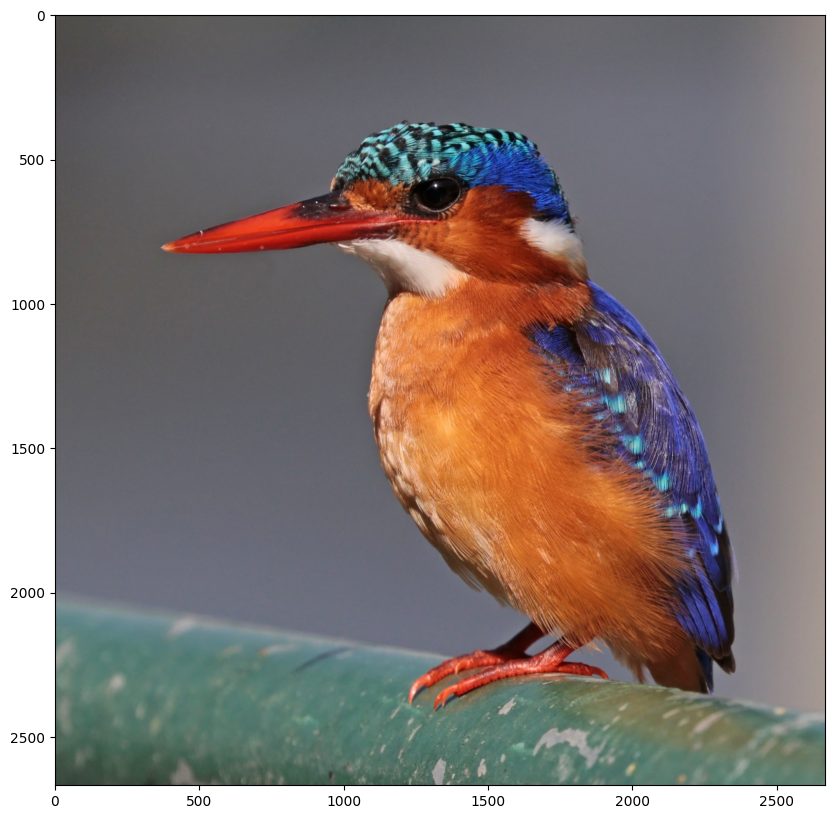

In [33]:
plt.figure(figsize=[10, 10])

img_b = cv2.imread('bird.jpg')
plt.imshow(img_b[:,:,::-1])
plt.show()

We can also remove the useless markers.

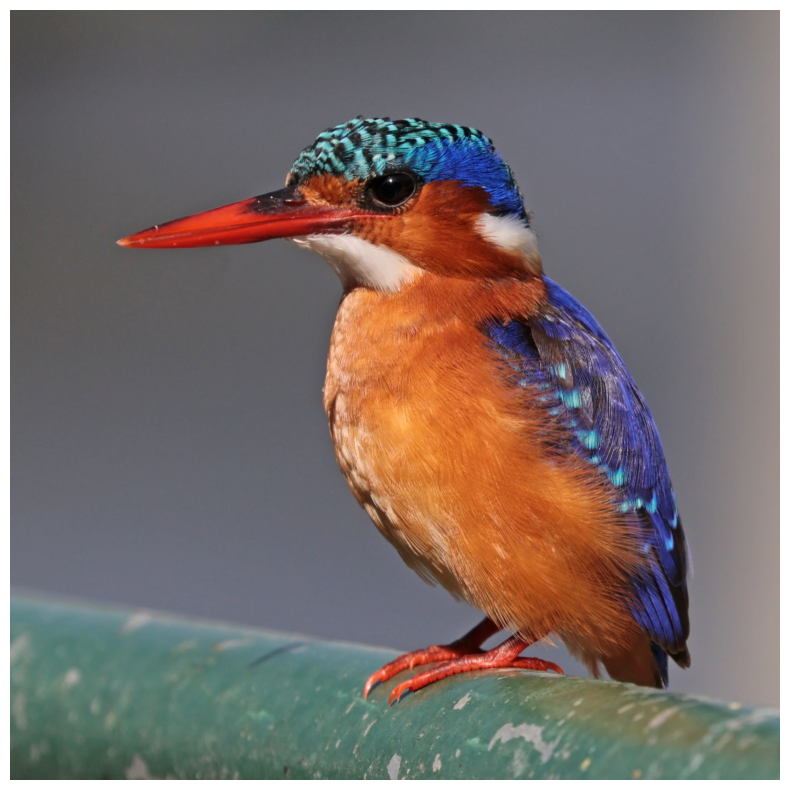

In [34]:
plt.figure(figsize=[10, 10])

img_b = cv2.imread('bird.jpg')
plt.imshow(img_b[:,:,::-1])
plt.axis('off')
plt.show()